In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import ComplementNB 

In [2]:
%run ../../functions/vectorize_functions.py

In [3]:
filepath_name = (('../../../data/twitter_hate-speech/train_cleaned.csv'))
df_cleaned = pd.read_csv(filepath_name, encoding='utf-8')


In [4]:
df_cleaned.head()

,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
0,8886,0,@user #cinemaaawards final rehearsals!! geari...,cinema award final rehearsal gear evening butt...,1,"['#cinemaaawards', '#butterflies', '#stage']",NaN
1,909,0,istg this is the best cheese ta but dayum expe...,tg good cheese day um expensive,0,[],NaN
2,27613,0,this was amazing. the weather was not. #musica...,amazing weather musical london matilda west en...,0,"['#musical', '#london', '#matilda', '#westend'...",NaN
3,15999,0,yes! #talented #sexy ‘criminal minds’ casts ...,yes talented sexy ' criminal mind ' cast serie...,2,"['#talented', '#sexy']",NaN
4,23817,0,want to be while being #successful? see how ...,want successful see work life balance help,2,"['#successful', '#worklifebalance']",NaN


### TF-IDF

In [5]:
X_train_tfidf, X_test_tfidf, y_train, y_test = vectorize_tfidf(df=df_cleaned, text_column='tweet_cleaned', 
                                                                                 label_column="label")

print("Trainingsdaten (TF-IDF-Matrix):")
print(X_train_tfidf.toarray())


Trainingsdaten (TF-IDF-Matrix):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Word2Vec

In [6]:
X_train_w2v, X_test_w2v, y_train, y_test = vectorize_w2v(df=df_cleaned, text_column ="tweet_cleaned", label_column="label")

print("Erste Trainingsvektoren:")
print(X_train_w2v[:5])

Erste Trainingsvektoren:
[[ 0.00652728  0.11428348 -0.32537743 ... -0.23050305  0.16763618
  -0.05160633]
 [-0.13225631  0.42661294 -0.46917854 ...  0.10285608  0.45504973
  -0.19146243]
 [-0.29598839  0.6837555   0.07658822 ...  0.0296613  -0.166169
  -0.244595  ]
 [ 0.04911207  0.26674416  0.17452751 ...  0.05247262 -0.06772295
   0.19960055]
 [-0.09670481  0.45893671 -0.07881605 ... -0.20681201  0.18679781
  -0.43109825]]


### Glove

In [7]:
X_train_glv, X_test_glv, y_train_glv, y_test_glv = vectorize_glove(df=df_cleaned, text_column='tweet_cleaned', 
                                                                                 label_column="label")

print("Erste Trainingsvektoren:")
print(X_train_glv[:5])


Erste Trainingsvektoren:
[[-5.83995998e-01 -4.50814003e-01 -1.03520198e-01 -1.30443999e-01
   8.65138965e-02  1.92340046e-02  4.19601603e-01  4.56660032e-02
   4.20637989e-01 -1.18462005e-01 -1.39499593e-01  8.61491919e-02
  -3.47116003e+00 -1.50919002e-01  4.83726099e-02  2.30306988e-01
   5.17714187e-01 -3.99389197e-01 -2.11020052e-02 -1.67889399e-01
  -1.19136802e-01  1.32564001e-01 -2.94382000e-01  3.61499602e-01
  -1.52469986e-02 -2.05316995e-01 -9.06082049e-02 -3.53236020e-02
   6.21600002e-03 -2.92328000e-01  1.01960000e-01  4.52970803e-01
  -3.02588001e-01  1.45708202e-01 -2.79505803e-01 -3.61108405e-01
  -3.34476000e-01 -4.75484607e-01  2.32840002e-01  7.72225988e-01
  -7.27289987e-01 -5.37127987e-02 -2.82940000e-01 -1.96698396e-01
   3.61826001e-01  1.10159996e-01  2.19800001e-01  5.36157990e-01
  -1.07716401e-01 -2.39284000e-01 -6.84846969e-01 -8.33071977e-02
  -1.78484796e-01  1.02971399e-01  1.37479798e-01 -1.09308004e-02
   3.91069996e-01 -6.16579987e-02  3.92153399e-01 -

### Vergleiche Methoden Logistic Regression

In [9]:
def compare_vectorization_methods_log(df, text_column, label_column):
    """
    Compares vectorizing methods TF-IDF, Word2Vec and Glove.
    """
    results = []

    # 1. TF-IDF
    print("Vektorisierung: TF-IDF")
    X_train_tfidf, X_test_tfidf, y_train, y_test = vectorize_tfidf(df, text_column, label_column)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    results.append({
        "Method": "TF-IDF",
        "Accuracy": accuracy_score(y_test, y_pred_tfidf),
        "Precision": precision_score(y_test, y_pred_tfidf),#, average="weighted"),
        "Recall": recall_score(y_test, y_pred_tfidf),#, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_tfidf)#, average="weighted")
    })

    # 2. Word2Vec
    print("Vektorisierung: Word2Vec")
    X_train_w2v, X_test_w2v, y_train, y_test = vectorize_w2v(df, text_column, label_column)
    clf.fit(X_train_w2v, y_train)
    y_pred_w2v = clf.predict(X_test_w2v)
    results.append({
        "Method": "Word2Vec",
        "Accuracy": accuracy_score(y_test, y_pred_w2v),
        "Precision": precision_score(y_test, y_pred_w2v),#, average="weighted"),
        "Recall": recall_score(y_test, y_pred_w2v),#, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_w2v)#, average="weighted")
    })

    # 3. Glove
    print("Vektorisierung: Glove")
    X_train_glv, X_test_glv, y_train, y_test = vectorize_glove(df, text_column, label_column)
    clf.fit(X_train_glv, y_train)
    y_pred_glv = clf.predict(X_test_glv)
    results.append({
        "Method": "Glove",
        "Accuracy": accuracy_score(y_test, y_pred_glv),
        "Precision": precision_score(y_test, y_pred_glv),#, average="weighted"),
        "Recall": recall_score(y_test, y_pred_glv),#, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_glv)#, average="weighted")
    })

    results_df = pd.DataFrame(results)
    return results_df

In [10]:
results_log = compare_vectorization_methods_log(df=df_cleaned, text_column="tweet_cleaned", label_column="label")

Vektorisierung: TF-IDF
Vektorisierung: Word2Vec
Vektorisierung: Glove


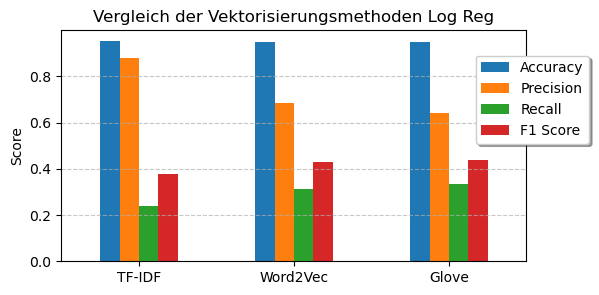

     Method  Accuracy  Precision    Recall  F1 Score
0    TF-IDF  0.951933   0.880000  0.239782  0.376874
1  Word2Vec  0.949620   0.684524  0.313351  0.429907
2     Glove  0.948299   0.642105  0.332425  0.438061


In [66]:
results_log.plot(x="Method", y=["Accuracy", "Precision", "Recall", "F1 Score"], kind="bar", figsize=(6, 3))
plt.title("Vergleich der Vektorisierungsmethoden Log Reg")
plt.ylabel("Score")
plt.xticks(rotation=0, ha='center')
plt.xlabel("Vektorisierungsmethode").set_visible(False)
plt.legend(loc='right', bbox_to_anchor=(1.15, 0.7),
          ncol=1, fancybox=True, shadow=True)
plt.grid(axis="y", linestyle="--", alpha=0.7)
#plt.savefig('logreg_vectorize_functions.png')
plt.show()
print(results_log)

### Vergleiche Methoden NB

In [12]:
def compare_vectorization_methods_gauss(df, text_column, label_column):
    """
    Compares vectorizing methods TF-IDF, Word2Vec and Glove.
    """
    results = []

    # 1. TF-IDF
    print("Vektorisierung: TF-IDF")
    X_train_tfidf, X_test_tfidf, y_train, y_test = vectorize_tfidf(df, text_column, label_column)
    clfcnb = ComplementNB()
    clfcnb.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clfcnb.predict(X_test_tfidf)
    results.append({
        "Method": "TF-IDF",
        "Accuracy": accuracy_score(y_test, y_pred_tfidf),
        "Precision": precision_score(y_test, y_pred_tfidf),#, average="weighted"),
        "Recall": recall_score(y_test, y_pred_tfidf),#, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_tfidf)#, average="weighted")
    })

    # 2. Word2Vec
    print("Vektorisierung: Word2Vec")
    X_train_w2v, X_test_w2v, y_train, y_test = vectorize_w2v(df, text_column, label_column)
    clfgnb = GaussianNB()
    clfgnb.fit(X_train_w2v, y_train)
    y_pred_w2v = clfgnb.predict(X_test_w2v)
    results.append({
        "Method": "Word2Vec",
        "Accuracy": accuracy_score(y_test, y_pred_w2v),
        "Precision": precision_score(y_test, y_pred_w2v),#, average="weighted"),
        "Recall": recall_score(y_test, y_pred_w2v),#, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_w2v)#, average="weighted")
    })

    # 3. Glove
    print("Vektorisierung: Glove")
    X_train_glv, X_test_glv, y_train, y_test = vectorize_glove(df, text_column, label_column)
    clfgnb.fit(X_train_glv, y_train)
    y_pred_glv = clfgnb.predict(X_test_glv)
    results.append({
        "Method": "Glove",
        "Accuracy": accuracy_score(y_test, y_pred_glv),
        "Precision": precision_score(y_test, y_pred_glv),#, average="weighted"),
        "Recall": recall_score(y_test, y_pred_glv),#, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_glv)#, average="weighted")
    })

    results_df = pd.DataFrame(results)
    return results_df

In [13]:
results_gauss = compare_vectorization_methods_gauss(df=df_cleaned, text_column="tweet_cleaned", label_column="label")

Vektorisierung: TF-IDF
Vektorisierung: Word2Vec
Vektorisierung: Glove


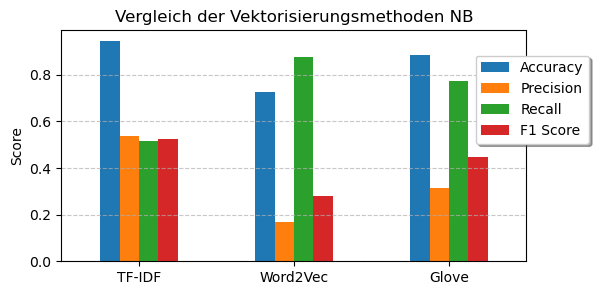

     Method  Accuracy  Precision    Recall  F1 Score
0    TF-IDF  0.943674   0.536932  0.514986  0.525730
1  Word2Vec  0.726627   0.166667  0.877384  0.280122
2     Glove  0.883218   0.312775  0.773842  0.445490


In [63]:
results_gauss.plot(x="Method", y=["Accuracy", "Precision", "Recall", "F1 Score"], kind="bar", figsize=(6, 3))
plt.title("Vergleich der Vektorisierungsmethoden NB")
plt.ylabel("Score")
plt.xlabel("Vektorisierungsmethode").set_visible(False)
plt.xticks(rotation=0, ha='center')
plt.legend(loc='right', bbox_to_anchor=(1.15, 0.7),
          ncol=1, fancybox=True, shadow=True)
plt.grid(axis="y", linestyle="--", alpha=0.7)
#plt.savefig('nb_vectorize_functions.png')
plt.show()
print(results_gauss)